In [36]:
# ! pip install pandas numpy matplotlib seaborn wordcloud

In [37]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import seaborn as sns
from wordcloud import WordCloud

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

pd.options.display.max_columns = None
pd.options.display.max_rows = 5

json_file = "news-dataset.json"

In [38]:
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)


df = pd.json_normalize(data, sep='_')

print(f"Total articles: {len(df)}")
df

Total articles: 100


,content_id,content_headline,content_type,content_publish_time,content_last_update,content_edits,content_categories,content_tags,content_word_count,content_department_path,body
0,1.6272172,CBC N.L. launches annual Make the Season Kind ...,Text,2021-12-06T04:30:00,2021-12-06T04:30:00,0,"[{'content_category': 'Holidays'}, {'content_c...","[{'type': 'generic', 'name': 'CBC Feed NL'}, {...",288,News/Canada/Nfld. & Labrador,CBC N.L. is kicking off the annual Make the Se...
1,1.5434542,Watch World Cup bobsleigh and skeleton from Ge...,Text,2020-01-21T18:06:39,2020-01-26T10:09:38,0,"[{'content_category': 'Women's sports'}, {'con...","[{'type': 'location', 'name': 'Canada'}, {'typ...",48,Sports/Olympics/Winter Sports/Sliding,Click on the video player above to watch live ...
...,...,...,...,...,...,...,...,...,...,...,...
98,1.5871770,"Zendaya, zombies and asteroids: The best new f...",Text,2021-01-14T04:00:00,2021-01-15T14:31:48,0,[],[],893,News/Entertainment,The final months of 2020 saw the with both D...
99,1.6196201,2024 Joan Donaldson CBC News Scholarship - Pos...,Text,2021-10-03T20:04:53,2024-02-16T13:10:11,0,[],"[{'type': 'organization', 'name': 'CBC News'}]",4501,News/Joan Donaldson Scholars,


In [39]:
chunk_size = 100
text = df.body[0]

chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

for i, chunk in enumerate(chunks):
    print(f"{chunk}")

CBC N.L. is kicking off the annual Make the Season Kind campaign for the month of December with spec
ial programming and a virtual coming together in support of food banks across the province. This yea
r, CBC N.L. is continuing to partner with the Community Food Sharing Association, an organization th
at distributes to food banks across Newfoundland and Labrador year-round to help keep pantries stock
ed for people in need.&nbsp; Included is the annual Feed N.L. Day on Dec. 10, which in 2020 helped r
aise&nbsp;$193,815 for local food banks. Some community organizations across Newfoundland and Labrad
or are experiencing increased calls for help leading up to the holidays.&nbsp; Bridges to Hope and F
ood First N.L. both say more first-time food bank users are reaching out. Maj. Rene Loveless of the 
Salvation Army said families and individuals are making tough decisions every day on how to put food
 on their tables while trying to make ends meet.&nbsp; "When it comes to the increased cost

In [40]:
df.info() # Notice, nulls in content_department_path ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   content_id               100 non-null    object
 1   content_headline         100 non-null    object
 2   content_type             100 non-null    object
 3   content_publish_time     100 non-null    object
 4   content_last_update      100 non-null    object
 5   content_edits            100 non-null    object
 6   content_categories       100 non-null    object
 7   content_tags             100 non-null    object
 8   content_word_count       100 non-null    object
 9   content_department_path  90 non-null     object
 10  body                     100 non-null    object
dtypes: object(11)
memory usage: 8.7+ KB


In [41]:
df.describe(include='all').T

,count,unique,top,freq
content_id,100,100,1.6272172,1
content_headline,100,100,CBC N.L. launches annual Make the Season Kind ...,1
...,...,...,...,...
content_department_path,90,35,News/World,11
body,100,99,,2


In [42]:
df["content_word_count"] = pd.to_numeric(df["content_word_count"], errors="coerce")

In [43]:
df["content_word_count"].isnull().sum()

np.int64(0)

In [44]:
df["content_categories"][0]

[{'content_category': 'Holidays'},
 {'content_category': 'Political campaigns'},
 {'content_category': 'Local food'},
 {'content_category': 'Food banks'}]

In [45]:
df["content_categories"].apply(lambda x: len(x) if isinstance(x, list) else 0)

0     4
1     2
     ..
98    0
99    0
Name: content_categories, Length: 100, dtype: int64

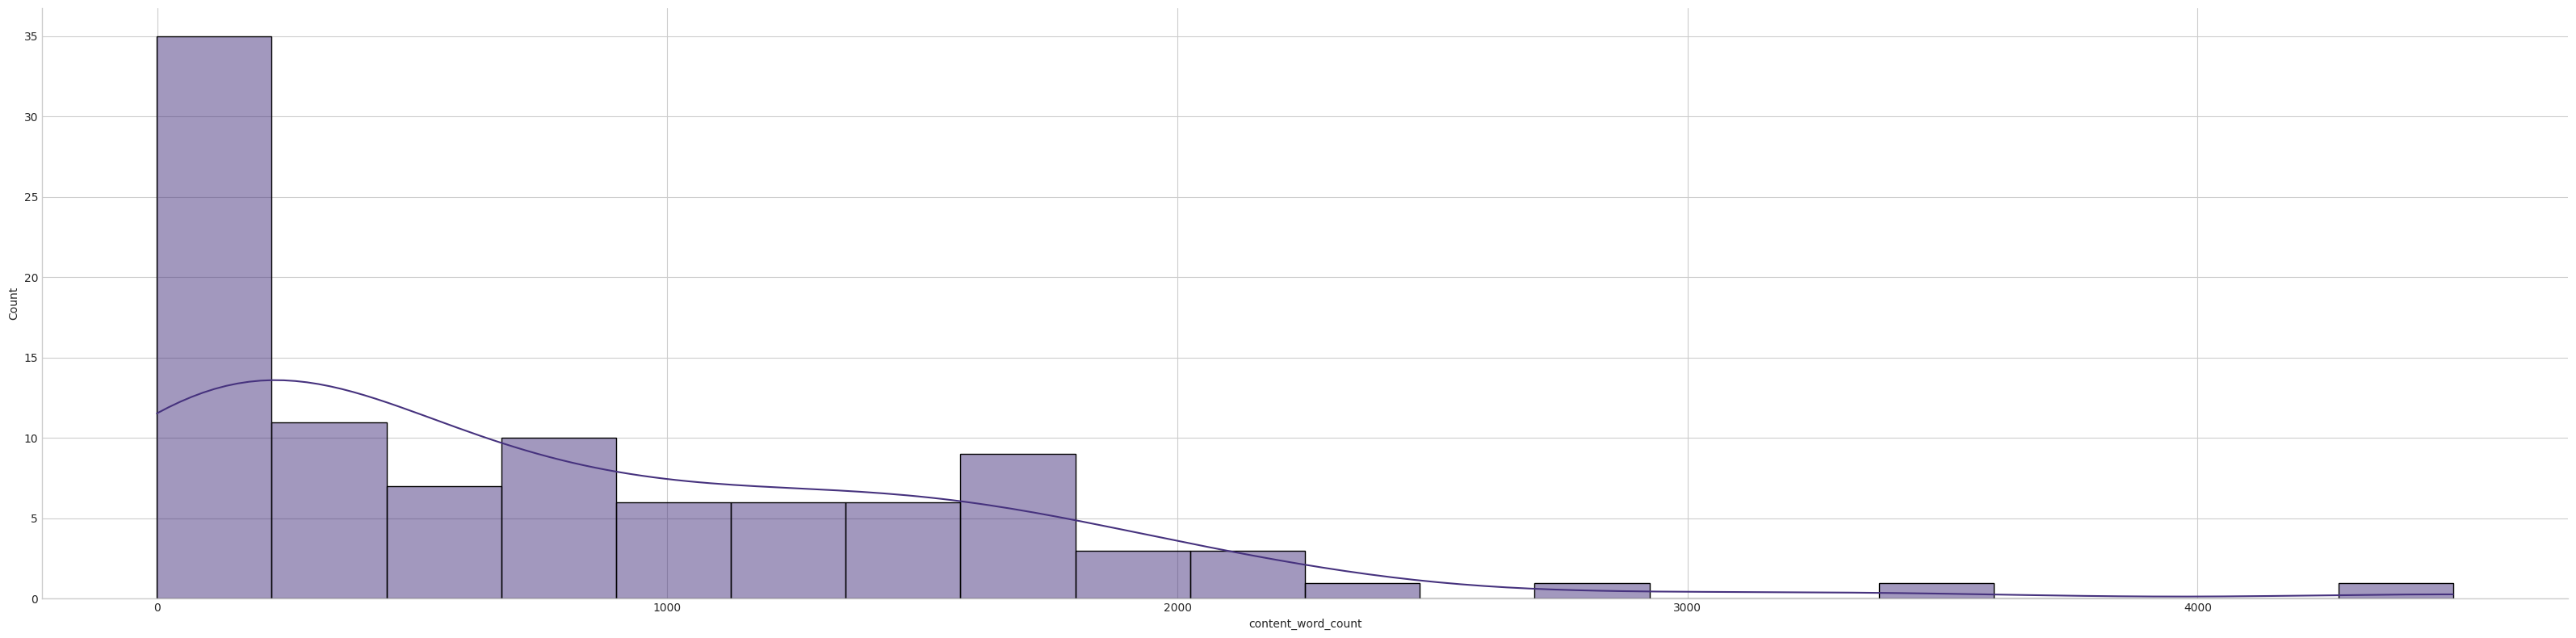

In [46]:
import seaborn as sns
sns.displot(df["content_word_count"], bins=20, kde=True , height=8, aspect=4); 

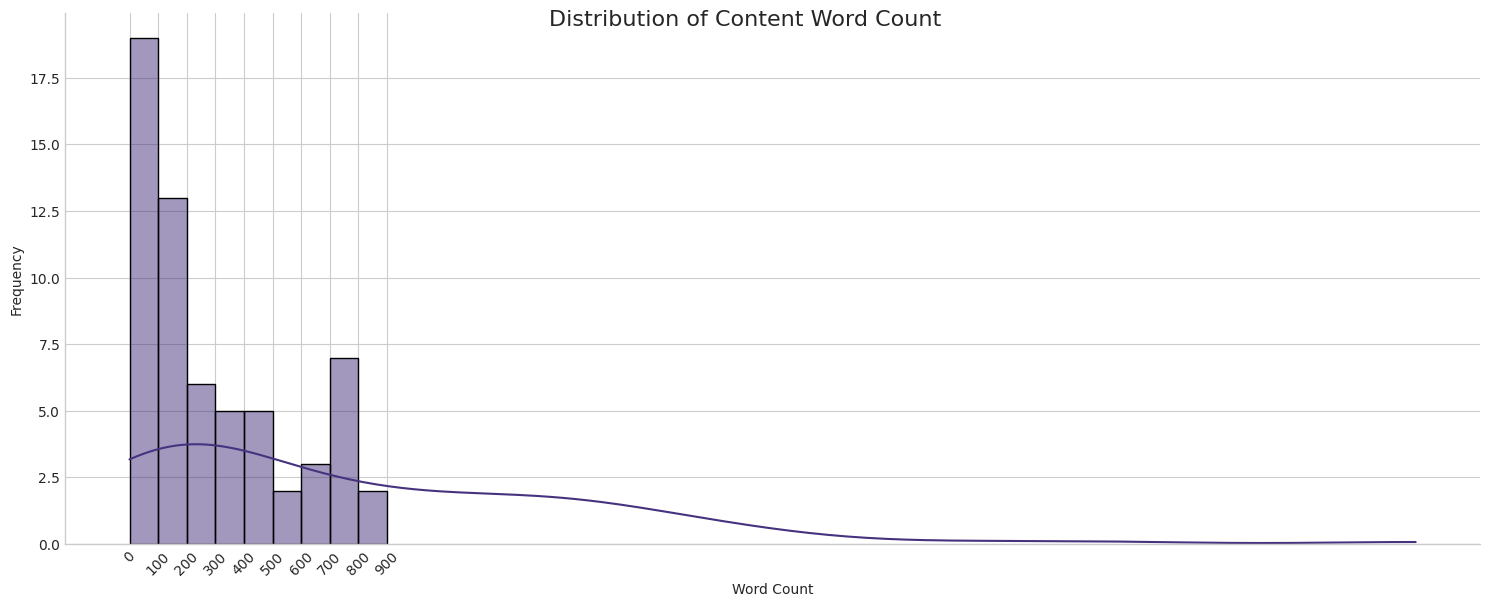

In [47]:
bin_edges = list(range(0, 1000, 100)) 

g = sns.displot(df["content_word_count"], kde=True, bins=bin_edges, height=6, aspect=2.5)

g.ax.set_xticks(bin_edges)

g.ax.set_xticklabels(bin_edges, rotation=45)
g.fig.suptitle("Distribution of Content Word Count", fontsize=16)
g.set_axis_labels("Word Count", "Frequency")

In [48]:
df["content_tags"][0]

[{'type': 'generic', 'name': 'CBC Feed NL'},
 {'type': 'generic', 'name': 'CBC Feed NL Day'},
 {'type': 'generic', 'name': 'Food banks'},
 {'type': 'generic', 'name': 'Food donations'},
 {'type': 'generic', 'name': 'donations'},
 {'type': 'location', 'name': 'Newfoundland and Labrador'},
 {'type': 'organization', 'name': 'CBC'},
 {'type': 'organization', 'name': 'Salvation Army'},
 {'type': 'person', 'name': 'Rene Loveless'}]

In [49]:
df.loc[df["content_word_count"] < 10, 'body']

3                                                      
43    The Tampa Bay Lightning visit the Colorado Ava...
Name: body, dtype: object

In [50]:
df.loc[3, 'body']

''

In [51]:
df.loc[43, 'body']

'The Tampa Bay Lightning visit the Colorado Avalanche for Game 5\xa0of their Stanley Cup\xa0final\xa0series on Friday\xa0at 8 p.m. ET on  . Watch coverage\xa0with our live stream\xa0on the CBC Sports app or tune in to CBC-TV. Please note that this stream is only designed to operate in the CBC Sports App. If you are viewing this on desktop or mobile web,   to watch this program.'

In [52]:
df = df[df["content_word_count"] >= 10].reset_index(drop=True)
df

,content_id,content_headline,content_type,content_publish_time,content_last_update,content_edits,content_categories,content_tags,content_word_count,content_department_path,body
0,1.6272172,CBC N.L. launches annual Make the Season Kind ...,Text,2021-12-06T04:30:00,2021-12-06T04:30:00,0,"[{'content_category': 'Holidays'}, {'content_c...","[{'type': 'generic', 'name': 'CBC Feed NL'}, {...",288,News/Canada/Nfld. & Labrador,CBC N.L. is kicking off the annual Make the Se...
1,1.5434542,Watch World Cup bobsleigh and skeleton from Ge...,Text,2020-01-21T18:06:39,2020-01-26T10:09:38,0,"[{'content_category': 'Women's sports'}, {'con...","[{'type': 'location', 'name': 'Canada'}, {'typ...",48,Sports/Olympics/Winter Sports/Sliding,Click on the video player above to watch live ...
...,...,...,...,...,...,...,...,...,...,...,...
96,1.5871770,"Zendaya, zombies and asteroids: The best new f...",Text,2021-01-14T04:00:00,2021-01-15T14:31:48,0,[],[],893,News/Entertainment,The final months of 2020 saw the with both D...
97,1.6196201,2024 Joan Donaldson CBC News Scholarship - Pos...,Text,2021-10-03T20:04:53,2024-02-16T13:10:11,0,[],"[{'type': 'organization', 'name': 'CBC News'}]",4501,News/Joan Donaldson Scholars,


In [53]:
df.loc[97, 'body'] # Need to recalculate content_word_count - it says 4501 here

'      '

In [54]:
df.loc[97, 'content_word_count']

np.int64(4501)

In [55]:
df["body_word_count"] = df["body"].apply(lambda x: len(str(x).split()))
df

,content_id,content_headline,content_type,content_publish_time,content_last_update,content_edits,content_categories,content_tags,content_word_count,content_department_path,body,body_word_count
0,1.6272172,CBC N.L. launches annual Make the Season Kind ...,Text,2021-12-06T04:30:00,2021-12-06T04:30:00,0,"[{'content_category': 'Holidays'}, {'content_c...","[{'type': 'generic', 'name': 'CBC Feed NL'}, {...",288,News/Canada/Nfld. & Labrador,CBC N.L. is kicking off the annual Make the Se...,278
1,1.5434542,Watch World Cup bobsleigh and skeleton from Ge...,Text,2020-01-21T18:06:39,2020-01-26T10:09:38,0,"[{'content_category': 'Women's sports'}, {'con...","[{'type': 'location', 'name': 'Canada'}, {'typ...",48,Sports/Olympics/Winter Sports/Sliding,Click on the video player above to watch live ...,30
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.5871770,"Zendaya, zombies and asteroids: The best new f...",Text,2021-01-14T04:00:00,2021-01-15T14:31:48,0,[],[],893,News/Entertainment,The final months of 2020 saw the with both D...,788
97,1.6196201,2024 Joan Donaldson CBC News Scholarship - Pos...,Text,2021-10-03T20:04:53,2024-02-16T13:10:11,0,[],"[{'type': 'organization', 'name': 'CBC News'}]",4501,News/Joan Donaldson Scholars,,0


In [56]:
#df["content_id"] = pd.to_numeric(df["content_id"], errors='coerce')
df["content_id"].isnull().sum() 

np.int64(0)

In [57]:
df["content_id"].value_counts(dropna=False)

content_id
1.6272172    1
1.5434542    1
            ..
1.5871770    1
1.6196201    1
Name: count, Length: 98, dtype: int64

# Enrich the Body Text using "content_categories"

NOTE: If we enrich Body Text using the content_headline, the accuracy of the model may become better, but technically for the 2nd task you specified it will be a data leakage. The 2nd task you specidief is - "suggest SEO-optimized headline for this article: [Insert article id]". Potentially, if a clinet want we can implement it. 

- The model will likely reuse or paraphrase the original headline, because it’s visible in context.
- In a functional sense, it’s a form of prompt leakage because the model has access to the ground truth label (the original headline) when you’re asking it to generate a headline.
- Thus I only add "content_categories"


In [58]:
df["content_categories"][0]

[{'content_category': 'Holidays'},
 {'content_category': 'Political campaigns'},
 {'content_category': 'Local food'},
 {'content_category': 'Food banks'}]

In [59]:
def format_categories(cat_list):
    if isinstance(cat_list, list):
        categories = [item.get("content_category", "") for item in cat_list if "content_category" in item]
        return "Content Category: " + ", ".join(categories) + "."
    return ""


df["body_updated"] = df.apply(lambda x: format_categories(x["content_categories"]) +  "\n" + str(x["body"]), axis=1)

In [60]:
df

,content_id,content_headline,content_type,content_publish_time,content_last_update,content_edits,content_categories,content_tags,content_word_count,content_department_path,body,body_word_count,body_updated
0,1.6272172,CBC N.L. launches annual Make the Season Kind ...,Text,2021-12-06T04:30:00,2021-12-06T04:30:00,0,"[{'content_category': 'Holidays'}, {'content_c...","[{'type': 'generic', 'name': 'CBC Feed NL'}, {...",288,News/Canada/Nfld. & Labrador,CBC N.L. is kicking off the annual Make the Se...,278,"Content Category: Holidays, Political campaign..."
1,1.5434542,Watch World Cup bobsleigh and skeleton from Ge...,Text,2020-01-21T18:06:39,2020-01-26T10:09:38,0,"[{'content_category': 'Women's sports'}, {'con...","[{'type': 'location', 'name': 'Canada'}, {'typ...",48,Sports/Olympics/Winter Sports/Sliding,Click on the video player above to watch live ...,30,"Content Category: Women's sports, Sports.\nCli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.5871770,"Zendaya, zombies and asteroids: The best new f...",Text,2021-01-14T04:00:00,2021-01-15T14:31:48,0,[],[],893,News/Entertainment,The final months of 2020 saw the with both D...,788,Content Category: .\nThe final months of 2020 ...
97,1.6196201,2024 Joan Donaldson CBC News Scholarship - Pos...,Text,2021-10-03T20:04:53,2024-02-16T13:10:11,0,[],"[{'type': 'organization', 'name': 'CBC News'}]",4501,News/Joan Donaldson Scholars,,0,Content Category: .\n


In [61]:
print(df["body"][0])

CBC N.L. is kicking off the annual Make the Season Kind campaign for the month of December with special programming and a virtual coming together in support of food banks across the province. This year, CBC N.L. is continuing to partner with the Community Food Sharing Association, an organization that distributes to food banks across Newfoundland and Labrador year-round to help keep pantries stocked for people in need.&nbsp; Included is the annual Feed N.L. Day on Dec. 10, which in 2020 helped raise&nbsp;$193,815 for local food banks. Some community organizations across Newfoundland and Labrador are experiencing increased calls for help leading up to the holidays.&nbsp; Bridges to Hope and Food First N.L. both say more first-time food bank users are reaching out. Maj. Rene Loveless of the Salvation Army said families and individuals are making tough decisions every day on how to put food on their tables while trying to make ends meet.&nbsp; "When it comes to the increased cost of suppl

In [62]:
print(df["body_updated"][0])

Content Category: Holidays, Political campaigns, Local food, Food banks.
CBC N.L. is kicking off the annual Make the Season Kind campaign for the month of December with special programming and a virtual coming together in support of food banks across the province. This year, CBC N.L. is continuing to partner with the Community Food Sharing Association, an organization that distributes to food banks across Newfoundland and Labrador year-round to help keep pantries stocked for people in need.&nbsp; Included is the annual Feed N.L. Day on Dec. 10, which in 2020 helped raise&nbsp;$193,815 for local food banks. Some community organizations across Newfoundland and Labrador are experiencing increased calls for help leading up to the holidays.&nbsp; Bridges to Hope and Food First N.L. both say more first-time food bank users are reaching out. Maj. Rene Loveless of the Salvation Army said families and individuals are making tough decisions every day on how to put food on their tables while tryi

In [63]:
df["body_word_count"] = df["body_updated"].apply(lambda x: len(str(x).split()))

In [64]:
max(df["body_word_count"]), min(df["body_word_count"])

(3293, 3)

In [65]:
df = df[df["body_word_count"] >= 10].reset_index(drop=True)

In [66]:
max(df["body_word_count"]), min(df["body_word_count"])

(3293, 14)

In [67]:
df[['content_id', 'body_updated']]

,content_id,body_updated
0,1.6272172,"Content Category: Holidays, Political campaign..."
1,1.5434542,"Content Category: Women's sports, Sports.\nCli..."
...,...,...
94,1.5324941,"Content Category: Language, Events, Dance.\nDe..."
95,1.5871770,Content Category: .\nThe final months of 2020 ...


In [68]:
# Save to proper json 

import json

data = df[['content_id', 'body_updated']].to_dict(orient='records')


for item in data:
    item['body_updated'] = item['body_updated'].replace('\xa0', ' ').replace('&nbsp;', ' ').strip()

with open(json_file + "_processed.json", 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

In [1]:
import requests

response = requests.get("http://localhost:5678")
print(response.status_code)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))